In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from odtlearn.fair_oct import (
    FairSPOCT,
    FairPEOCT,
)

# `FairOCT` Example

First we generate the data for our example. The diagram within the code block visualizes the training data. We have two binary features (`X1`,`X2`) and two class labels (`+1` and `-1`). The protected feature is race, and it has two levels (`B` and `W`). In the visualization of the training data, we see that, for example, there are 7 instances with `(X1,X2) = (0,1)` and among these 7 instances, 5 of them are from race `W` and 2 of them from race `B`. We also show the breakdown of the instances based on their class label.

In [2]:
'''
        X2                    |
        |                     |
        1    5W: 4(-) 1(+)    |     2W: 1(-) 1(+)
        |    2B: 2(-)         |     5B: 3(-) 2(+)
        |                     |    
        |                     |   
        |---------------------|------------------------
        |                     |
        0    4W: 3(-) 1(+)    |         3W: 1(-) 2(+) 
        |    1B:      1(+)    |         6B: 1(-) 5(+)
        |                     | 
        |___________0_________|__________1_____________X1
'''


X = np.array([[0,0],[0,0],[0,0],[0,0],[0,0],
                [1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],
                [1,1],[1,1],[1,1],[1,1],[1,1],[1,1],[1,1],
                [0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1]])
P = np.array([0,0,0,0,1,
                0,0,0,1,1,1,1,1,1,
                0,0,1,1,1,1,1,
                0,0,0,0,0,1,1])
y = np.array([0,0,0,1,1,
                0,1,1,0,1,1,1,1,1,
                0,1,0,0,0,1,1,
                0,0,0,0,1,0,0])
P = P.reshape(-1,1)

l = X[:,1]

Let's investigate the following scenarios
   
- We evaluate statistical parity (SP) when we don't enforce any fairness constraint
- We evaluate SP when we add SP constraint with fairbound 0.1
- We evaluate predictive equality (PE) when we don't enforce any fairness constraint
- We evaluate PE when we add PE constraint with fairbound 0.04

We add a helper function for displaying the results from each scenario

## Evaluating Statistical Parity without Fairness Constraint

In [3]:
fcl_wo_SP = FairSPOCT(
    solver="gurobi",
    positive_class=1,
    depth=2,
    _lambda=0.01,
    time_limit=100,
    fairness_bound=1,
    num_threads=None,
    obj_mode="acc",
    verbose=False,
)
fcl_wo_SP.fit(X, y, P, l)


Set parameter Username
Academic license - for non-commercial use only - expires 2024-06-27
Set parameter TimeLimit to value 100
Set parameter NodeLimit to value 1073741824
Set parameter SolutionLimit to value 1073741824
Set parameter IntFeasTol to value 1e-06
Set parameter Method to value 3
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (mac64[arm])

CPU model: Apple M1 Pro
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1192 rows, 615 columns and 3124 nonzeros
Model fingerprint: 0xe9eb7e11
Variable types: 14 continuous, 601 integer (601 binary)
Coefficient statistics:
  Matrix range     [7e-02, 1e+00]
  Objective range  [1e-02, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 12.8700000
Presolve removed 734 rows and 294 columns
Presolve time: 0.01s
Presolved: 458 rows, 321 columns, 1450 nonzeros
Variable types: 14 continuous, 307 integer (305 binary)

Root relaxation: obj

FairSPOCT(solver=gurobi,depth=2,time_limit=100,num_threads=None,verbose=False)

Next we calculate a summary for the fairness metric and the in-sample accuracy

In [4]:
print(
    pd.DataFrame(
        fcl_wo_SP.calc_metric(P, fcl_wo_SP.predict(X)).items(),
        columns=["(p,y)", "P(Y=y|P=p)"],
    )
)

    (p,y)  P(Y=y|P=p)
0  (0, 0)    0.785714
1  (1, 0)    0.571429
2  (0, 1)    0.214286
3  (1, 1)    0.428571


In [5]:
print(
    "The in-sample accuracy is {}".format(
        np.sum(fcl_wo_SP.predict(X) == y) / y.shape[0]
    )
)

The in-sample accuracy is 0.7142857142857143


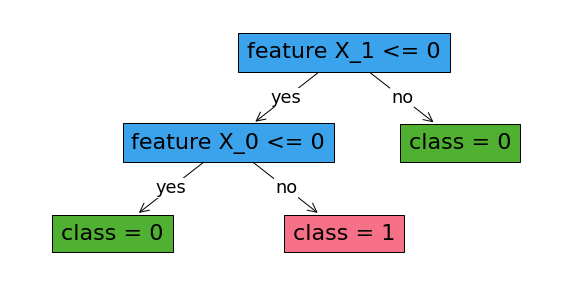

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))
fcl_wo_SP.plot_tree()
plt.show()

## Evaluating Statistical Parity with Fairbound=0.1

In [7]:
fcl_w_SP = FairSPOCT(
    solver="gurobi",
    positive_class=1,
    depth=2,
    _lambda=0.01,
    time_limit=100,
    fairness_bound=0.1,
    num_threads=None,
    obj_mode="acc",
    verbose=False,
)
fcl_w_SP.fit(X, y, P, l)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-06-27
Set parameter TimeLimit to value 100
Set parameter NodeLimit to value 1073741824
Set parameter SolutionLimit to value 1073741824
Set parameter IntFeasTol to value 1e-06
Set parameter Method to value 3
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (mac64[arm])

CPU model: Apple M1 Pro
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1192 rows, 615 columns and 3124 nonzeros
Model fingerprint: 0x0654e912
Variable types: 14 continuous, 601 integer (601 binary)
Coefficient statistics:
  Matrix range     [7e-02, 1e+00]
  Objective range  [1e-02, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e-01, 1e+00]
Found heuristic solution: objective 12.8700000
Presolve removed 734 rows and 294 columns
Presolve time: 0.01s
Presolved: 458 rows, 321 columns, 1450 nonzeros
Variable types: 14 continuous, 307 integer (305 binary)

Root relaxation: obj

FairSPOCT(solver=gurobi,depth=2,time_limit=100,num_threads=None,verbose=False)

In [8]:
print(
    pd.DataFrame(
        fcl_w_SP.calc_metric(P, fcl_w_SP.predict(X)).items(),
        columns=["(p,y)", "P(Y=y|P=p)"],
    )
)

    (p,y)  P(Y=y|P=p)
0  (0, 1)         0.5
1  (1, 1)         0.5
2  (0, 0)         0.5
3  (1, 0)         0.5


In [9]:
print(
    "The in-sample accuracy is {}".format(np.sum(fcl_w_SP.predict(X) == y) / y.shape[0])
)

The in-sample accuracy is 0.6785714285714286


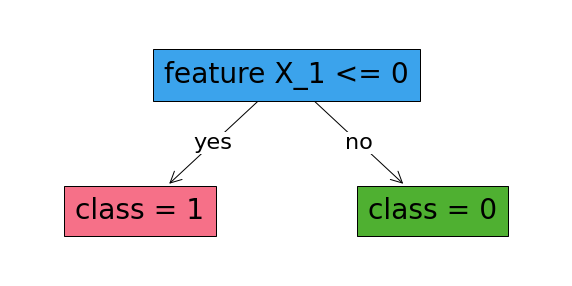

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
fcl_w_SP.plot_tree()
plt.show()

## Evaluating PE Without Fairness Constraint

In [11]:
fcl_wo_PE = FairPEOCT(
    solver="gurobi",
    positive_class=1,
    depth=2,
    _lambda=0.01,
    time_limit=100,
    fairness_bound=1,
    num_threads=None,
    obj_mode="acc",
    verbose=False,
)
fcl_wo_PE.fit(X, y, P, l)


Set parameter Username
Academic license - for non-commercial use only - expires 2024-06-27
Set parameter TimeLimit to value 100
Set parameter NodeLimit to value 1073741824
Set parameter SolutionLimit to value 1073741824
Set parameter IntFeasTol to value 1e-06
Set parameter Method to value 3
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (mac64[arm])

CPU model: Apple M1 Pro
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1192 rows, 615 columns and 2942 nonzeros
Model fingerprint: 0x6c429b62
Variable types: 14 continuous, 601 integer (601 binary)
Coefficient statistics:
  Matrix range     [1e-01, 1e+00]
  Objective range  [1e-02, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 12.8700000
Presolve removed 1192 rows and 615 columns
Presolve time: 0.01s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.01 work units)
Thread cou

FairPEOCT(solver=gurobi,depth=2,time_limit=100,num_threads=None,verbose=False)

In [12]:
print(
    pd.DataFrame(
        fcl_wo_PE.calc_metric(P, y, fcl_wo_PE.predict(X)).items(),
        columns=["(p, y, y_pred)", "P(Y_pred=y_pred|P=p, Y=y)"],
    )
)

  (p, y, y_pred)  P(Y_pred=y_pred|P=p, Y=y)
0      (0, 0, 0)                   0.888889
1      (1, 0, 0)                   0.833333
2      (0, 0, 1)                   0.111111
3      (1, 0, 1)                   0.166667
4      (0, 1, 0)                   0.600000
5      (1, 1, 0)                   0.375000
6      (0, 1, 1)                   0.400000
7      (1, 1, 1)                   0.625000


In [13]:
print(
    "The in-sample accuracy is {}".format(
        np.sum(fcl_wo_PE.predict(X) == y) / y.shape[0]
    )
)

The in-sample accuracy is 0.7142857142857143


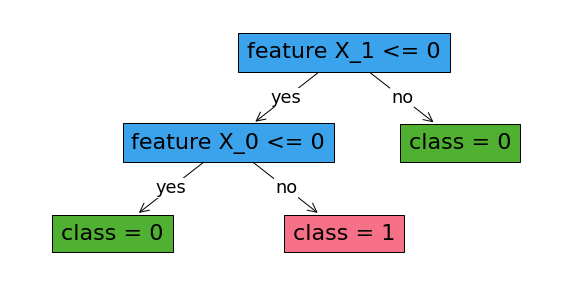

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
fcl_wo_PE.plot_tree()
plt.show()

## Evaluating PE with Fairbound=0.04

In [15]:
fcl_w_PE = FairPEOCT(
    solver="gurobi",
    positive_class=1,
    depth=2,
    _lambda=0.01,
    time_limit=100,
    fairness_bound=0.04,
    num_threads=None,
    obj_mode="acc",
    verbose=False,
)
fcl_w_PE.fit(X, y, P, l)


Set parameter Username
Academic license - for non-commercial use only - expires 2024-06-27
Set parameter TimeLimit to value 100
Set parameter NodeLimit to value 1073741824
Set parameter SolutionLimit to value 1073741824
Set parameter IntFeasTol to value 1e-06
Set parameter Method to value 3
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (mac64[arm])

CPU model: Apple M1 Pro
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1192 rows, 615 columns and 2942 nonzeros
Model fingerprint: 0x244097c5
Variable types: 14 continuous, 601 integer (601 binary)
Coefficient statistics:
  Matrix range     [1e-01, 1e+00]
  Objective range  [1e-02, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [4e-02, 1e+00]
Found heuristic solution: objective 12.8700000
Presolve removed 1181 rows and 593 columns
Presolve time: 0.01s
Presolved: 11 rows, 22 columns, 61 nonzeros
Found heuristic solution: objective 14.8500000
Variable types: 0 continuous, 22 

FairPEOCT(solver=gurobi,depth=2,time_limit=100,num_threads=None,verbose=False)

In [16]:
print(
    pd.DataFrame(
        fcl_w_PE.calc_metric(P, y, fcl_w_PE.predict(X)).items(),
        columns=["(p, y, y_pred)", "P(Y_pred=y_pred|P=p, Y=y)"],
    )
)

  (p, y, y_pred)  P(Y_pred=y_pred|P=p, Y=y)
0      (0, 0, 0)                        1.0
1      (1, 0, 0)                        1.0
2      (0, 0, 1)                        0.0
3      (1, 0, 1)                        0.0
4      (0, 1, 0)                        1.0
5      (1, 1, 0)                        1.0
6      (0, 1, 1)                        0.0
7      (1, 1, 1)                        0.0


In [17]:
print(
    "The in-sample accuracy is {}".format(np.sum(fcl_w_PE.predict(X) == y) / y.shape[0])
)

The in-sample accuracy is 0.5357142857142857


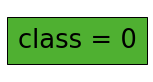

In [18]:
fig, ax = plt.subplots(figsize=(2.5, 1.25))
fcl_w_PE.plot_tree()
plt.show()